In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
books = pd.read_csv('data/books_step3_output.csv')

In [36]:
books.set_index('book_id', inplace=True)

In [15]:
# Create a small set for initial modelling
small_books = pd.DataFrame(books.iloc[:100])

In [11]:
from sklearn.cluster import KMeans
x = small_books.drop(['description','title', 'similar_books','authors'], axis=1).values

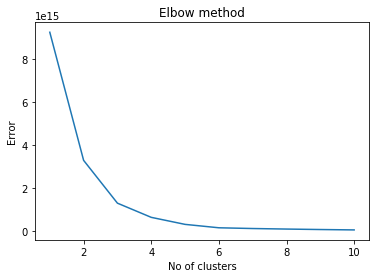

In [12]:
Error = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

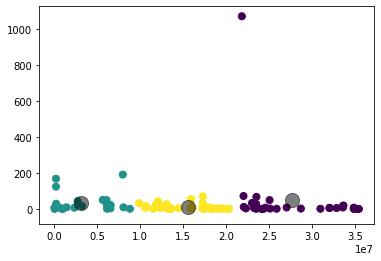

In [13]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3, s=50, cmap='viridis')

centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [16]:
small_books['cluster'] = y_kmeans3

In [31]:
small_books.set_index('book_id', inplace=True)
small_books.head()

,average_rating,cluster
book_id,,
13571772,4.28,2
35452242,4.05,0
707611,4.06,1
27036536,4.15,0
11827783,3.16,2


In [19]:
# Keep only average ratings and cluster for books
small_books = small_books[['book_id','average_rating','cluster']]

In [18]:
reviews = pd.read_csv('data/reviews_step3_output.csv')

In [20]:
users = pd.pivot_table(reviews, index=['user_id','book_id'], values='rating')

In [21]:
users.head()

rating
user_id                          book_id         
00009e46d18f223a82b22da38586b605 23546829       3
000192962b87d560f00b06fdcbd71681 30025791       5
0003a8eb2989503d03ad7ca701898a48 15780398       2
                                 22738008       0
                                 23479604       0

In [22]:
# create a small set of users
small_users = pd.DataFrame(users.iloc[:100])

In [23]:
small_users.shape

(100, 1)

In [46]:
assert 23546829 in books.index

AssertionError: 

In [43]:
data.head()

,rating,average_rating,cluster
book_id,,,
23546829,3.0,NaN,NaN
30025791,5.0,NaN,NaN
15780398,2.0,NaN,NaN
22738008,0.0,NaN,NaN
23479604,0.0,NaN,NaN


In [29]:
data.head()

,book_id,average_rating,cluster,rating
0,13571772,4.28,2,NaN
1,35452242,4.05,0,NaN
2,707611,4.06,1,NaN
3,27036536,4.15,0,NaN
4,11827783,3.16,2,NaN
